In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer



In [2]:
# Load from your CSV file
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.Type.value_counts().sort_index()

,count
Type,
1,70
2,76
3,17
5,13
6,9
7,29


In [4]:
df['household'] = df.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
df.household.value_counts()

,count
household,
0,163
1,51


In [5]:
df.sort_values( by = 'Al', inplace=True)
X= np.array(df.Al).reshape(-1,1)
y = df.household


In [25]:

X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X, y, test_size=0.2, random_state=42)


lr_model = LogisticRegression()
lr_model.fit(X_train_set, y_train_set)


probabilities = lr_model.predict_proba(X_test_set)[:, 1]  # Probability of class 1 (household)

threshold_values = [0.3, 0.4, 0.5, 0.6, 0.7]

accuracy_scores = []
precision_scores = []
recall_scores = []

for threshold in threshold_values:
    # Convert probabilities to binary predictions based on the threshold
    binary_predictions = (probabilities >= threshold).astype(int)

    # Compute the evaluation metrics
    accuracy_val = accuracy_score(y_test_set, binary_predictions)
    precision_val = precision_score(y_test_set, binary_predictions)
    recall_val = recall_score(y_test_set, binary_predictions)

    # Store scores for plotting
    accuracy_scores.append(accuracy_val)
    precision_scores.append(precision_val)
    recall_scores.append(recall_val)

    # Print the results for each threshold
    print(f"Threshold: {threshold:.2f}, Accuracy: {accuracy_val:.2f}, Precision: {precision_val:.2f}, Recall: {recall_val:.2f}")


Threshold: 0.30, Accuracy: 0.81, Precision: 0.79, Recall: 0.69
Threshold: 0.40, Accuracy: 0.74, Precision: 0.78, Recall: 0.44
Threshold: 0.50, Accuracy: 0.74, Precision: 0.86, Recall: 0.38
Threshold: 0.60, Accuracy: 0.74, Precision: 1.00, Recall: 0.31
Threshold: 0.70, Accuracy: 0.70, Precision: 1.00, Recall: 0.19


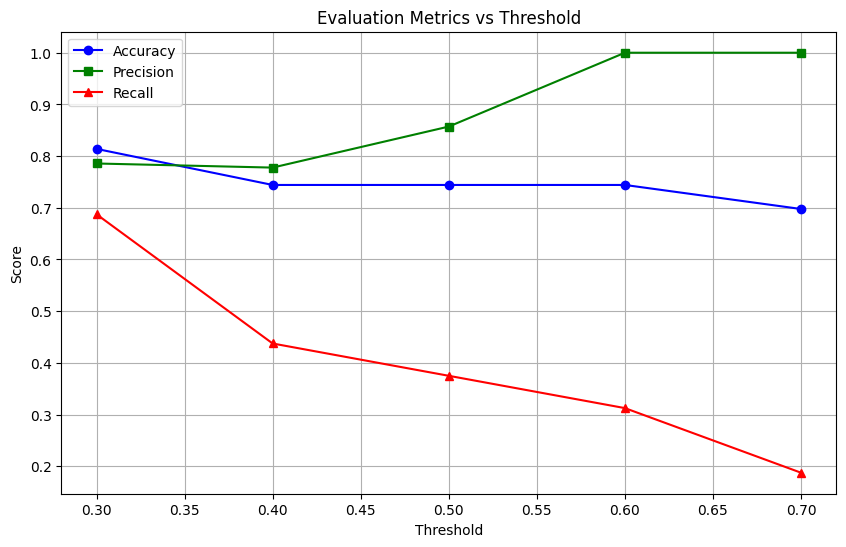

In [26]:

plt.figure(figsize=(10, 6))
plt.plot(threshold_values, accuracy_scores, marker='o', label='Accuracy', color='blue')
plt.plot(threshold_values, precision_scores, marker='s', label='Precision', color='green')
plt.plot(threshold_values, recall_scores, marker='^', label='Recall', color='red')

plt.title("Evaluation Metrics vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
element_list = ['RI', 'Na', 'Mg', 'Si', 'K', 'Ca', 'Ba', 'Fe']

In [14]:
for element in element_list:
    X_element = np.array(df[element]).reshape(-1, 1)
    y_target = df.household

    X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X_element, y_target, test_size=0.2, random_state=42)

    lr_model = LogisticRegression()
    lr_model.fit(X_train_set, y_train_set)

    probs = lr_model.predict_proba(X_test_set)[:, 1]

    threshold_values = [0.3, 0.4, 0.5, 0.6, 0.7]

    for threshold in threshold_values:
        binary_predictions = (probs >= threshold).astype(int)

        accuracy_val = accuracy_score(y_test_set, binary_predictions)
        precision_val = precision_score(y_test_set, binary_predictions)
        recall_val = recall_score(y_test_set, binary_predictions)

        print(f"Element: {element}, Threshold: {threshold:.2f}, Accuracy: {accuracy_val:.2f}, Precision: {precision_val:.2f}, Recall: {recall_val:.2f}")


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

Element: RI, Threshold: 0.30, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element: RI, Threshold: 0.40, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element: RI, Threshold: 0.50, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element: RI, Threshold: 0.60, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element: RI, Threshold: 0.70, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element: Na, Threshold: 0.30, Accuracy: 0.77, Precision: 0.71, Recall: 0.62
Element: Na, Threshold: 0.40, Accuracy: 0.81, Precision: 0.83, Recall: 0.62
Element: Na, Threshold: 0.50, Accuracy: 0.81, Precision: 0.90, Recall: 0.56
Element: Na, Threshold: 0.60, Accuracy: 0.72, Precision: 0.83, Recall: 0.31
Element: Na, Threshold: 0.70, Accuracy: 0.72, Precision: 0.83, Recall: 0.31
Element: Mg, Threshold: 0.30, Accuracy: 0.91, Precision: 0.88, Recall: 0.88
Element: Mg, Threshold: 0.40, Accuracy: 0.84, Precision: 0.85, Recall: 0.69
Element: Mg, Threshold: 0.50, Accuracy: 0.84, Precision: 0.85, Recall: 0.69
Element: Mg,

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

Element: Ca, Threshold: 0.30, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element: Ca, Threshold: 0.40, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element: Ca, Threshold: 0.50, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element: Ca, Threshold: 0.60, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element: Ca, Threshold: 0.70, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element: Ba, Threshold: 0.30, Accuracy: 0.77, Precision: 0.88, Recall: 0.44
Element: Ba, Threshold: 0.40, Accuracy: 0.74, Precision: 0.86, Recall: 0.38
Element: Ba, Threshold: 0.50, Accuracy: 0.72, Precision: 0.83, Recall: 0.31
Element: Ba, Threshold: 0.60, Accuracy: 0.70, Precision: 0.80, Recall: 0.25
Element: Ba, Threshold: 0.70, Accuracy: 0.70, Precision: 0.80, Recall: 0.25
Element: Fe, Threshold: 0.30, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element: Fe, Threshold: 0.40, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element: Fe, Threshold: 0.50, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element: Fe,

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

In [16]:
X_features = df.drop(columns=['Type', 'household'])
y_target = df['household']

X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

numeric_columns = X_features.select_dtypes(include=['float64']).columns
categorical_columns = X_features.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_columns),
                  ('cat', categorical_transformer, categorical_columns)])

clf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', LogisticRegression())])

clf_pipeline.fit(X_train_set, y_train_set)

y_predictions = clf_pipeline.predict(X_test_set)

accuracy_val = accuracy_score(y_test_set, y_predictions)
print("Accuracy:", accuracy_val)


Accuracy: 0.8837209302325582


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

features_list = ['Na', 'Mg', 'Si', 'K', 'Ca', 'Ba', 'Fe']
target_values = df['household']

for feature in features_list:
    feature_data = df[[feature]].values
    X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(feature_data, target_values, test_size=0.2, random_state=1)

    lr_classifier = LogisticRegression()
    lr_classifier.fit(X_train_set, y_train_set)
    prob_scores = lr_classifier.predict_proba(X_test_set)[:, 1]

    print(f"\nEvaluating Feature: {feature}")
    for threshold in [0.3, 0.4, 0.5, 0.6, 0.7]:
        binary_preds = (prob_scores >= threshold).astype(int)
        accuracy_val = accuracy_score(y_test_set, binary_preds)
        precision_val = precision_score(y_test_set, binary_preds)
        recall_val = recall_score(y_test_set, binary_preds)
        print(f"Threshold: {threshold:.1f} | Accuracy: {accuracy_val:.2f}, Precision: {precision_val:.2f}, Recall: {recall_val:.2f}")



Evaluating Feature: Na
Threshold: 0.3 | Accuracy: 0.67, Precision: 0.28, Recall: 0.83
Threshold: 0.4 | Accuracy: 0.79, Precision: 0.38, Recall: 0.83
Threshold: 0.5 | Accuracy: 0.88, Precision: 0.56, Recall: 0.83
Threshold: 0.6 | Accuracy: 0.88, Precision: 0.60, Recall: 0.50
Threshold: 0.7 | Accuracy: 0.88, Precision: 0.67, Recall: 0.33

Evaluating Feature: Mg
Threshold: 0.3 | Accuracy: 0.84, Precision: 0.44, Recall: 0.67
Threshold: 0.4 | Accuracy: 0.84, Precision: 0.44, Recall: 0.67
Threshold: 0.5 | Accuracy: 0.81, Precision: 0.38, Recall: 0.50
Threshold: 0.6 | Accuracy: 0.84, Precision: 0.43, Recall: 0.50
Threshold: 0.7 | Accuracy: 0.86, Precision: 0.50, Recall: 0.50

Evaluating Feature: Si
Threshold: 0.3 | Accuracy: 0.88, Precision: 0.67, Recall: 0.33
Threshold: 0.4 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00
Threshold: 0.5 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00
Threshold: 0.6 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00
Threshold: 0.7 | Accuracy: 0.86, Precision: 0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p


Evaluating Feature: K
Threshold: 0.3 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00
Threshold: 0.4 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00
Threshold: 0.5 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

Threshold: 0.6 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00
Threshold: 0.7 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00

Evaluating Feature: Ca
Threshold: 0.3 | Accuracy: 0.77, Precision: 0.17, Recall: 0.17
Threshold: 0.4 | Accuracy: 0.84, Precision: 0.00, Recall: 0.00
Threshold: 0.5 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Threshold: 0.6 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00
Threshold: 0.7 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00

Evaluating Feature: Ba
Threshold: 0.3 | Accuracy: 0.88, Precision: 0.60, Recall: 0.50
Threshold: 0.4 | Accuracy: 0.88, Precision: 0.60, Recall: 0.50
Threshold: 0.5 | Accuracy: 0.88, Precision: 0.60, Recall: 0.50
Threshold: 0.6 | Accuracy: 0.88, Precision: 0.60, Recall: 0.50
Threshold: 0.7 | Accuracy: 0.86, Precision: 0.50, Recall: 0.17

Evaluating Feature: Fe
Threshold: 0.3 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00
Threshold: 0.4 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00
Threshold: 0.5 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

Threshold: 0.6 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00
Threshold: 0.7 | Accuracy: 0.86, Precision: 0.00, Recall: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

features_data = df.drop(columns=['Type', 'household'])
target_values = df['household']

numeric_columns = features_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

preprocessor = ColumnTransformer([
    ('scale_numeric', StandardScaler(), numeric_columns)
])

lr_pipeline = Pipeline([
    ('prep', preprocessor),
    ('logistic', LogisticRegression())
])

X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(features_data, target_values, test_size=0.2, random_state=1)
lr_pipeline.fit(X_train_set, y_train_set)

predicted_probabilities = lr_pipeline.predict_proba(X_test_set)[:, 1]


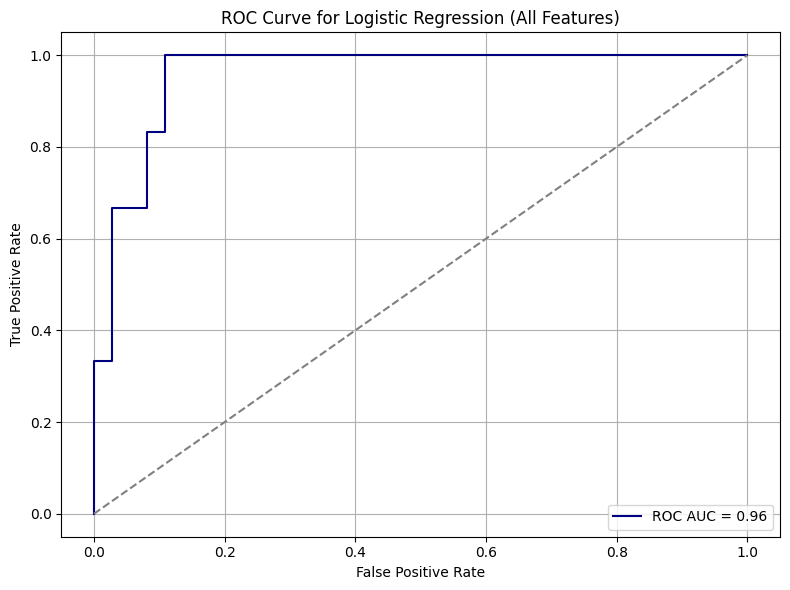

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, threshold_vals = roc_curve(y_test_set, predicted_probabilities)
roc_auc_score = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, label=f'ROC AUC = {roc_auc_score:.2f}', color='navy')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title('ROC Curve for Logistic Regression (All Features)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
